In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases # Python has a file containing a dictionary of encoding names and associated aliases

# The matplotlib plots will appear directly below the cell in which the plot function was called
%matplotlib inline

#### Read in the CSV files and remove duplicates

In [ ]:
# To find encoding that work

# Below line creates a set of all available encodings
alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df = pd.read_csv('Dataset/crime.csv', nrows=10, encoding=encoding) # Read in only 10 lines for faster read 
        print('Successful.', encoding)
    except:
        pass

Successful. cp855
Successful. cp861
Successful. iso8859_10
Successful. cp857
Successful. cp1256
Successful. cp949
Successful. cp852
Successful. gbk
Successful. cp1253
Successful. mac_cyrillic
Successful. cp858
Successful. cp869
Successful. latin_1
Successful. cp865
Successful. cp864
Successful. cp860
Successful. cp862
Successful. iso8859_3
Successful. cp1255
Successful. iso8859_14
Successful. mac_latin2
Successful. big5hkscs
Successful. cp932
Successful. mac_greek
Successful. cp850
Successful. cp863
Successful. cp500
Successful. cp775
Successful. iso8859_8
Successful. koi8_r
Successful. ptcp154
Successful. iso8859_16
Successful. kz1048
Successful. cp1026
Successful. utf_16_be
Successful. cp1258
Successful. utf_16_le
Successful. iso8859_15
Successful. mac_roman
Successful. iso8859_2
Successful. cp1252
Successful. iso8859_5
Successful. cp1140
Successful. cp037
Successful. hp_roman8
Successful. iso8859_13
Successful. mac_turkish
Successful. iso8859_11
Successful. iso8859_4
Successful. cp1

In [ ]:
# Read in the crime.csv file and use the timestamp as a datetime index
crime = pd.read_csv('Dataset/crime.csv', encoding='ISO-8859-11')

In [46]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [47]:
crime.shape

(319073, 17)

In [48]:
crime.duplicated().sum()

np.int64(23)

In [49]:
crime.drop_duplicates(inplace=True)

In [50]:
crime.shape

(319050, 17)

#### Explore the dataset

In [51]:
crime

# To see all rows
# pd.options.display.max_rows = None
# To see 4 rows 
# pd.options.display.max_rows = 4

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [52]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long                 2

In [53]:
# Changing the data type from object to datetime for the OCCURRED_ON_DATE column 
crime.OCCURRED_ON_DATE = pd.to_datetime(crime.OCCURRED_ON_DATE)

In [54]:
# Check if it works?
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET             

In [55]:
# Easily extract datetime information frame the OCCURRED_ON_DATE column
crime.OCCURRED_ON_DATE.dt.year
'''
crime.OCCURRED_ON_DATE.dt.month
crime.OCCURRED_ON_DATE.dt.weekday
crime.OCCURRED_ON_DATE.dt.hour
crime.OCCURRED_ON_DATE.dt.minute
'''

'\ncrime.OCCURRED_ON_DATE.dt.month\ncrime.OCCURRED_ON_DATE.dt.weekday\ncrime.OCCURRED_ON_DATE.dt.hour\ncrime.OCCURRED_ON_DATE.dt.minute\n'

In [56]:
# Summary information on the non-numeric columns
crime.describe(include='object')

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [57]:
crime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [58]:
crime.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318031
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19998
Long                    19998
Location                    0
dtype: int64

In [59]:
# Checking for columns with missing values
crime.columns[np.sum(crime.isnull()) != 0]

C:\Users\rbnro\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [60]:
# Checking for columns with no missing values
crime.columns[np.sum(crime.isnull()) == 0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [61]:
# Checking for the number of unique values in each column
for col in crime.columns:
    unique_count = crime[col].nunique()
    print(col+' has '+str(unique_count)+' unique values.')

INCIDENT_NUMBER has 282517 unique values.
OFFENSE_CODE has 222 unique values.
OFFENSE_CODE_GROUP has 67 unique values.
OFFENSE_DESCRIPTION has 244 unique values.
DISTRICT has 12 unique values.
REPORTING_AREA has 879 unique values.
SHOOTING has 1 unique values.
OCCURRED_ON_DATE has 233229 unique values.
YEAR has 4 unique values.
MONTH has 12 unique values.
DAY_OF_WEEK has 7 unique values.
HOUR has 24 unique values.
UCR_PART has 4 unique values.
STREET has 4657 unique values.
Lat has 18178 unique values.
Long has 18178 unique values.
Location has 18194 unique values.


### Let's answer some questions

##### 1. What are the most common crimes in terms of offense groups?

In [62]:
crime.OFFENSE_CODE_GROUP.value_counts()

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18749
Other                                        18073
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: count, Length: 67, dtype: int64

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
Investigate Person                 0.058765
Other                              0.056646
Drug Violation                     0.051857
Simple Assault                     0.049604
Vandalism                          0.048312
Verbal Disputes                    0.041056
Towed                              0.035377
Name: count, dtype: float64

Text(0.5, 1.0, 'Top 10 Offense Groups (as % of all crimes)')

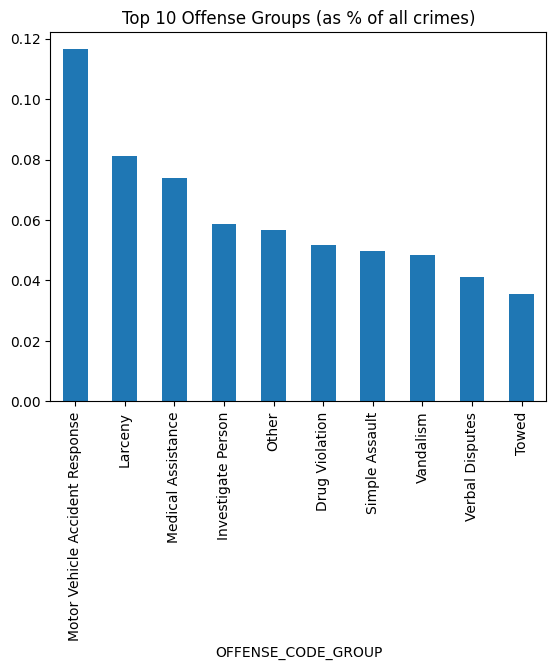

In [63]:
# Top 10 OFFENSE GROUP
offense_group_val = crime.OFFENSE_CODE_GROUP.value_counts()[:10]
percerntage_value = offense_group_val/crime.shape[0]
display(percerntage_value)

# Creating a bar chart of the Top 10 OFFENSE GROUP
percerntage_value.plot(kind='bar')
plt.title('Top 10 Offense Groups (as % of all crimes)')

##### 2. What are the least common offense groups?

In [64]:
crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]

OFFENSE_CODE_GROUP
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Burglary - No Property Taken                  2
Biological Threat                             2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Gambling                                      8
Manslaughter                                  8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: count, dtype: int64

##### 3. What are the most common offense descriptions?

In [65]:
offense_des_val = crime.OFFENSE_DESCRIPTION.value_counts()
offense_des_val

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON                  18783
INVESTIGATE PERSON                             18753
M/V - LEAVING SCENE - PROPERTY DAMAGE          16323
VANDALISM                                      15153
ASSAULT SIMPLE - BATTERY                       14791
                                               ...  
B&E RESIDENCE DAY - NO FORCE                       1
ROBBERY - UNARMED - BUSINESS                       1
B&E NON-RESIDENCE NIGHT - FORCE                    1
PROSTITUTE - COMMON NIGHTWALKER                    1
DRUGS - POSS CLASS D - INTENT MFR DIST DISP        1
Name: count, Length: 244, dtype: int64

Text(0.5, 1.0, 'Top 10 Offense Description (as % of all crimes)')

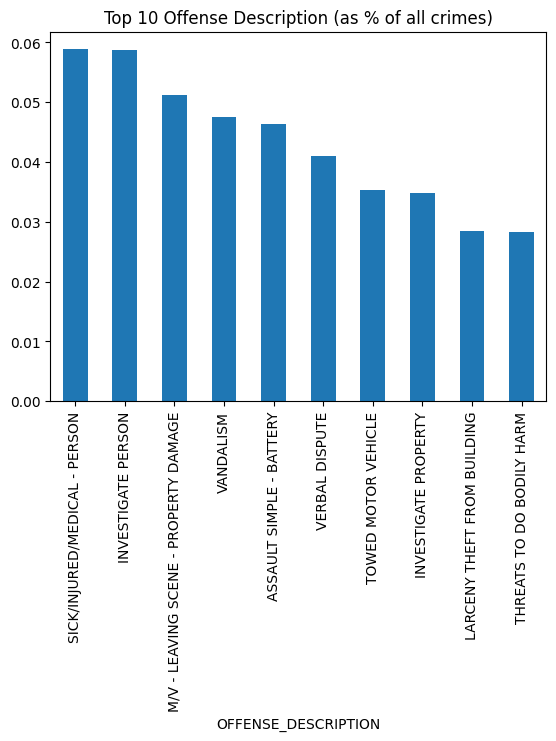

In [66]:
top_values = offense_des_val[:10]
percerntage_value = top_values/crime.shape[0]

percerntage_value.plot(kind='bar')
plt.title('Top 10 Offense Description (as % of all crimes)')

##### 4. In which year were the most crimes committed?

YEAR
2015     53371
2016     99110
2017    100884
2018     65685
Name: INCIDENT_NUMBER, dtype: int64

Text(0.5, 1.0, 'Number of Crimes Per Year')

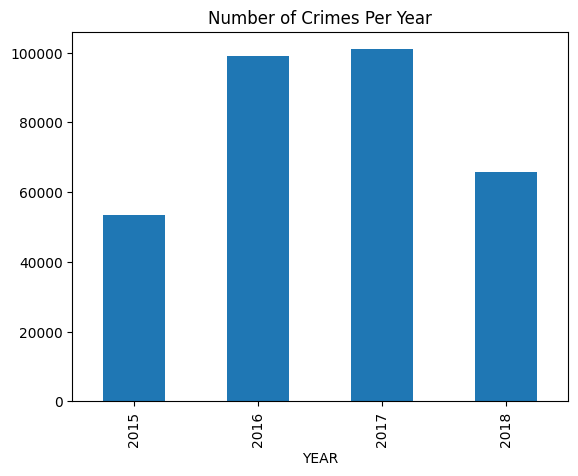

In [67]:
crime_year = crime.groupby('YEAR').count()['INCIDENT_NUMBER']
display(crime_year)
crime_year.plot(kind='bar')
plt.title('Number of Crimes Per Year')

##### 5. Are there more crimes committed on specific days?

DAY_OF_WEEK
Friday       48489
Monday       45674
Saturday     44816
Sunday       40313
Thursday     46655
Tuesday      46376
Wednesday    46727
Name: INCIDENT_NUMBER, dtype: int64

Text(0.5, 1.0, 'Crime Count of Week Days')

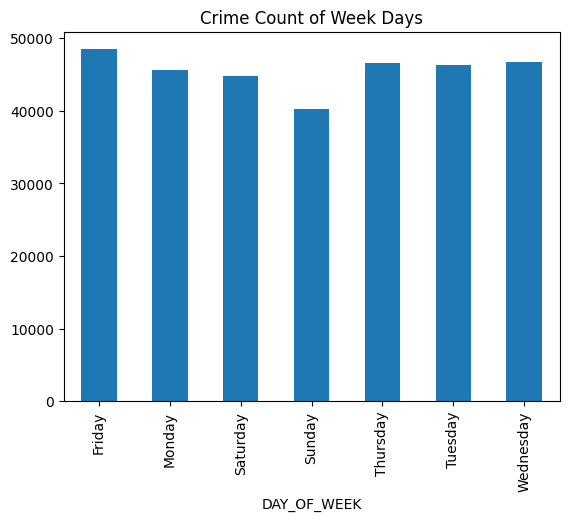

In [68]:
days_crime_number = crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER']
display(days_crime_number)
days_crime_number.plot(kind='bar')
plt.title('Crime Count of Week Days')

##### 6. Are there more crimes during specific hours?

Text(0.5, 1.0, 'Crime Count of Hours')

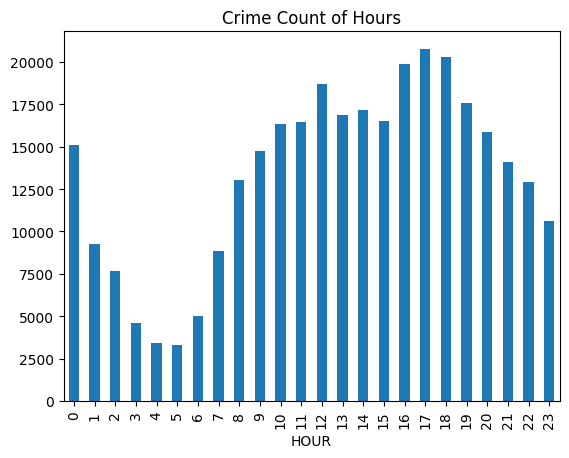

In [69]:
hour_crime_number = crime.groupby('HOUR').count()['INCIDENT_NUMBER']
#display(hour_crime_number)
hour_crime_number.plot(kind='bar')
plt.title('Crime Count of Hours')

##### 7. On what days and during which hours are the most crimes committed?

<Axes: ylabel='HOUR'>

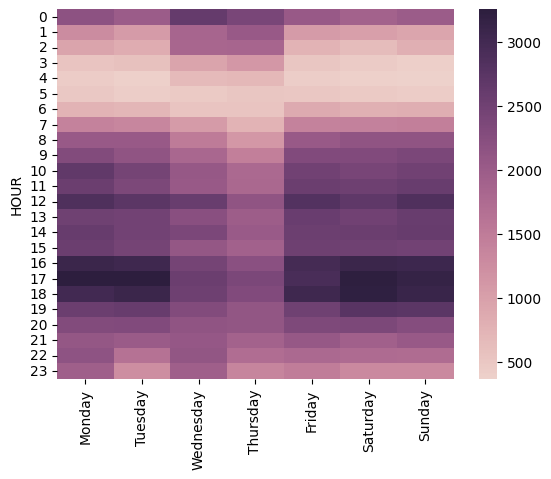

In [70]:
week_and_hour = crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()
week_and_hour.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#display(week_and_hour)
sns.heatmap(week_and_hour,cmap=sns.cubehelix_palette(as_cmap=True))

##### 8. In which months were the number of crimes below average?

In [71]:
avg_crime = crime.groupby(['YEAR','MONTH']).count()['INCIDENT_NUMBER'].mean()
print('The average number of crime is: '+str(avg_crime))

year_and_month = crime.groupby(['MONTH','YEAR']).count()['INCIDENT_NUMBER'].unstack()

def style_negative(v,props=''):
    return props if v < avg_crime else None
style_apply = year_and_month.style.map(style_negative,props='color:blue;')\
                .map(lambda v:'opacity:20%;' if((v<0.3)and(v>-0.3)) else None)
style_apply

# Use apply to highlight the maximum in a column in darkgreen
def highlight_max(s,props=''):
    return np.where(s==np.nanmax(s.values),props,'')

style_apply.apply(highlight_max,props='color:white;background-color:darkgreen',axis=0)

The average number of crime is: 7976.25


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


##### 9. In which districts were the most crimes committed on yearly basis?

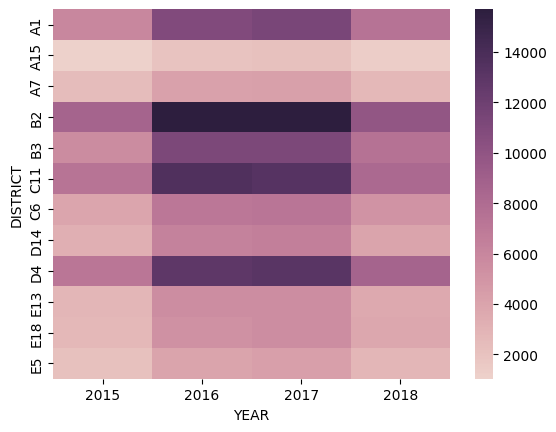

In [72]:
district_and_year = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

sns.heatmap(district_and_year, cmap=sns.cubehelix_palette(as_cmap=True));

In [73]:
avg_crime1 = crime.groupby(['DISTRICT','YEAR']).count()['INCIDENT_NUMBER'].mean()
print('The average number of crime in district is: '+str(avg_crime1))

year_and_district = crime.groupby(['DISTRICT','YEAR']).count()['INCIDENT_NUMBER'].unstack()

def style_negative(v,props=''):
    return props if v < avg_crime1 else None
style_apply1 = year_and_district.style.map(style_negative,props='color:blue;')\
                .map(lambda v:'opacity:20%;' if((v<0.3)and(v>-0.3)) else None)
style_apply1

# Use apply to highlight the maximum in a column in darkgreen
def highlight_max(s,props=''):
    return np.where(s==np.nanmax(s.values),props,'')

style_apply1.apply(highlight_max,props='color:white;background-color:darkgreen',axis=0)

The average number of crime in district is: 6610.104166666667


YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601


In [74]:
'''
crime_district_year = crime.groupby(['YEAR','DISTRICT']).count()['INCIDENT_NUMBER'].m

# Sort the values within each year by descending order
sorted_crime_district_year = (
    crime_district_year
    .reset_index()  # Reset index to manipulate the YEAR and DISTRICT columns
    .sort_values(['YEAR', 'INCIDENT_NUMBER'], ascending=[True, False])  # Sort by YEAR and then by count
    .set_index(['YEAR', 'DISTRICT'])  # Set the index back to YEAR and DISTRICT
)
display(sorted_crime_district_year)

most_crime = crime.groupby('OCCURRED_ON_DATE').count()['INCIDENT_NUMBER'].sort_values(ascending=False)
most_crime
'''

"\ncrime_district_year = crime.groupby(['YEAR','DISTRICT']).count()['INCIDENT_NUMBER'].m\n\n# Sort the values within each year by descending order\nsorted_crime_district_year = (\n    crime_district_year\n    .reset_index()  # Reset index to manipulate the YEAR and DISTRICT columns\n    .sort_values(['YEAR', 'INCIDENT_NUMBER'], ascending=[True, False])  # Sort by YEAR and then by count\n    .set_index(['YEAR', 'DISTRICT'])  # Set the index back to YEAR and DISTRICT\n)\ndisplay(sorted_crime_district_year)\n\nmost_crime = crime.groupby('OCCURRED_ON_DATE').count()['INCIDENT_NUMBER'].sort_values(ascending=False)\nmost_crime\n"